In [1]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.0.5
sklearn: 0.22.2.post1


In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
from keras.datasets import mnist
import numpy as np
from google.colab.patches import cv2_imshow

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# visualize the data
from google.colab.patches import cv2_imshow
cv2_imshow(X_test[0])

In [5]:
# reshape data
x_train = np.reshape(X_train, (60000, 784))
x_test = np.reshape(X_test, (10000, 784))
x_train = x_train[:1000]
x_test = x_test[:100]
y_train = y_train[:1000]
y_test = y_test[:100]

In [6]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.850000 (0.015492)


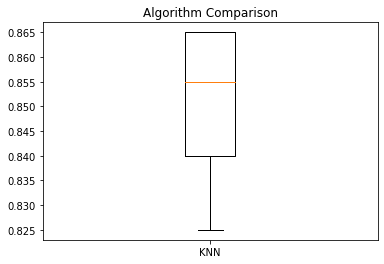

In [7]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [8]:
# make predictions
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Make predictions on validation dataset
model = SVC()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  1  0  0]
 [ 0  0  1  8  0  2  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  1  0  0  6  0  0  0  0]
 [ 0  0  2  0  1  0  7  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  1  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        14
           2       0.64      0.88      0.74         8
           3       1.00      0.73      0.84        11
           4       0.93      1.00      0.97        14
           5       0.75      0.86      0.80         7
           6       1.00      0.70      0.82        10
           7       0.88      0.93      0.90        15
           8       1.00      1.00      1.00         2
           9       0.91      0.91      0.91        11

    accuracy                           0.90       100
   macro avg   